<a href="https://www.kaggle.com/code/danielcowleydata/austin-housing-eda-price-modelling?scriptVersionId=255198536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "austinhousingprices"

In [2]:
library(readr)
library(tidyverse)
library(ggplot2)
library(scales)

# For plotly workaround
library(htmlwidgets)
library(IRdisplay)

raw_df <- read_csv("/kaggle/input/austinhousingprices/austinHousingData.csv")


Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




Rows: 15171 Columns: 47


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): city, streetAddress, description, homeType, latestPriceSource, ho...
dbl  (34): zpid, zipcode, latitude, longitude, propertyTaxRate, garageSpaces...
lgl   (6): hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, hasView
date  (1): latest_saledate



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Exploratory Data Analysis (EDA)

In [3]:
head(raw_df)

zpid       city         streetAddress         zipcode
1  111373431 pflugerville 14424 Lake Victor Dr  78660  
2  120900430 pflugerville 1104 Strickling Dr    78660  
3 2084491383 pflugerville 1408 Fort Dessau Rd   78660  
4  120901374 pflugerville 1025 Strickling Dr    78660  
5   60134862 pflugerville 15005 Donna Jane Loop 78660  
6 2080105342 pflugerville 14908 Spring Hill Ln  78660  
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1 14424 Lake Victor Dr, Pflugerville, TX 78660 is a single family home that contains 2,601 sq ft and was built in 2012. It contains 4 bedrooms and 3 bathrooms. \r\n \r\nThe Zestimate for this house is $344,417. The Rent Zestimate for this home is $2,195/mo.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2 Absolutely GORGEOUS 4 Bedroom home with 2 full baths located in the tucked away Pflugerville community The Lakes at Northtown. This home was recently updated with new carpets, new tile kitchen back splash, and fresh paint throughout the entire house. This charming abode is a MUST SEE if you're looking for an affordable home in the Austin area. Something very hard to come by in this market!  Only 14 miles from downtown, this home will accommodate downtown commuting as well as a work from home environment. This community is tucked away and yet only minutes from major retailers and shopping. Do not miss this opportunity!                                                                                                                                                                                                                                                                                                              
3 Under construction - estimated completion in August 2019.  The Pioneer features an expansive open floorplan, 3 spacious bedrooms, 2 bathrooms, and a stunning kitchen. Upon entering the Pioneer, you will pass through the impressive entry way. Keep walking, and you will pass the two private secondary bedrooms which both have large walk-in closets. The entryway leads you into the huge open family room and kitchen area with a huge island with granite counters.  Next to the kitchen is the dining room, conveniently separated from the main living area of the family room.  A large covered patio greets you as you walk out the back door into the backyard.  A private and spacious master suite is the cherry on top of this home and will provide a quiet place for you to relax after a long day.  This home is very close to

## Data Cleaning

Looking at our initial dataset, we recognize that there are some factors which are unsuitable for model training such as: streetAddress, zpid (Zillow Listing ID), description, etc. Closer inspection of the dataset also reveals most listings priced under $100,000 are innacurate so we prune the dataset accordingly, leaving us with 15,111 complete observations. Lastly, we change all factors using boolean values to integers.

In [4]:
df <- raw_df %>% 
  select(where(~ !is.character(.))) %>%
  select(-zpid) %>% 
  select(-latest_saledate) %>%
  select(-latest_salemonth) %>%
  mutate(across(where(is.logical), as.numeric)) %>%
  filter(latestPrice >= 100000)

head(df)

zipcode latitude longitude propertyTaxRate garageSpaces hasAssociation
1 78660   30.43063 -97.66308 1.98            2            1             
2 78660   30.43267 -97.66170 1.98            2            1             
3 78660   30.40975 -97.63977 1.98            0            1             
4 78660   30.43211 -97.66166 1.98            2            1             
5 78660   30.43737 -97.65686 1.98            0            1             
6 78660   30.43777 -97.65618 1.98            2            1             
  hasCooling hasGarage hasHeating hasSpa ⋯ numOfElementarySchools
1 1          1         1          0      ⋯ 0                     
2 1          1         1          0      ⋯ 0                     
3 1          0         1          0      ⋯ 2                     
4 1          1         1          0      ⋯ 0                     
5 1          0         1          0      ⋯ 0                     
6 1          1         1          0      ⋯ 0                     
  numOfMiddleSchools numOfHighSchools avgSchoolDistance avgSchoolRating
1 1                  1                1.266667          2.666667       
2 1                  1                1.400000          2.666667       
3 1                  1                1.200000          3.000000       
4 1                  1                1.400000          2.666667       
5 1                  1                1.133333          4.000000       
6 1                  1                1.066667          4.000000       
  avgSchoolSize MedianStudentsPerTeacher numOfBathrooms numOfBedrooms
1 1063          14                       3              4            
2 1063          14                       2              4            
3 1108          14                       2              3            
4 1063          14                       2              3            
5 1223          14                       3              3            
6 1223          14                       2              3            
  numOfStories
1 2           
2 1           
3 1           
4 1           
5 2           
6 1

In [5]:
# Dataset Dimensions
print(dim(df))

[1] 15111    38


In [6]:
# Check for missing entries
print(paste("Number of missing entries:", sum(is.na(df))))

[1] "Number of missing entries: 0"


## Univariate Analysis

We inspect some commonly highlighted features of property listings and their distributions in the dataset. Note: For listing prices, we use a logarithmic scale to distribute the data more normally.



In [7]:
# Number of listings over $1,000,000
above_mil <- sum(df$latestPrice >= 1000000)

print(paste("Number of properties listed above $1,000,000:", above_mil))
print(paste0("Percentage of properties listed above $1,000,000: ", round(above_mil / nrow(df) * 100, digits = 2), "%"))

[1] "Number of properties listed above $1,000,000: 953"


[1] "Percentage of properties listed above $1,000,000: 6.31%"


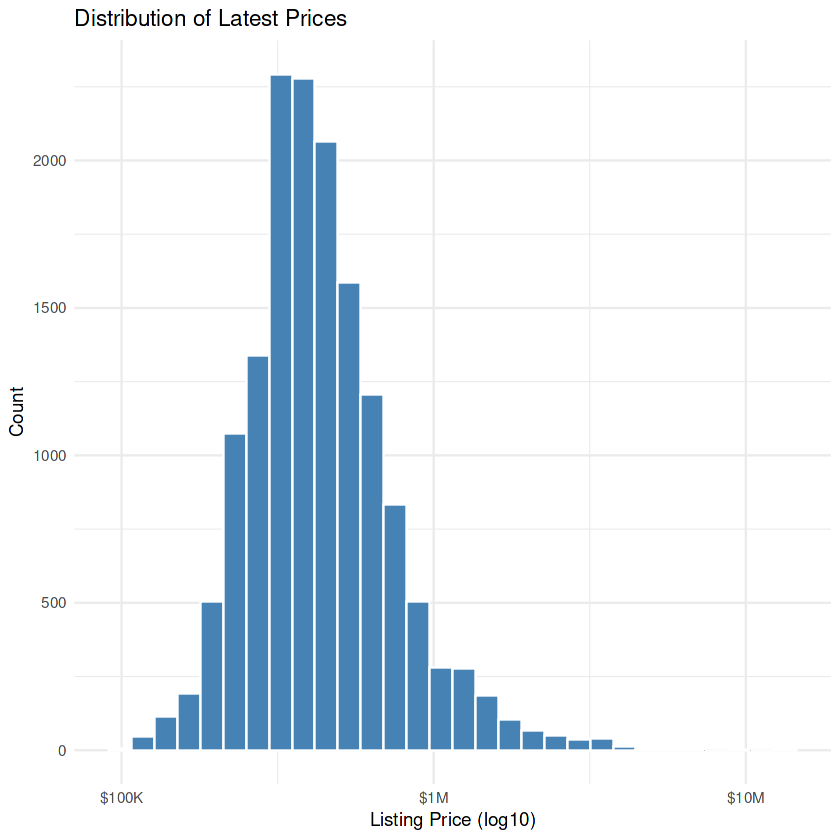

In [8]:
# Histogram of prices
ggplot(df, aes(x = latestPrice)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  scale_x_log10(labels = label_dollar(scale_cut = cut_short_scale())) +
  labs(
    title = "Distribution of Latest Prices",
    x = "Listing Price (log10)",
    y = "Count"
  ) +
  theme_minimal()

In [9]:
library(plotly)

# Create individual boxplots
p1 <- plot_ly(df, y = ~livingAreaSqFt, type = "box", name = "Living Area (SqFt)") %>%
  layout(yaxis = list(title = "SqFt"))

p2 <- plot_ly(df, y = ~numOfBedrooms, type = "box", name = "Bedrooms") %>%
  layout(yaxis = list(title = "Count"))

p3 <- plot_ly(df, y = ~numOfBathrooms, type = "box", name = "Bathrooms") %>%
  layout(yaxis = list(title = "Count"))

p4 <- plot_ly(df, y = ~yearBuilt, type = "box", name = "Year Built") %>%
  layout(yaxis = list(title = "Year"))

# Combine into one row of plots
p = subplot(p1, p2, p3, p4, nrows = 1, shareX = FALSE, titleX = TRUE, titleY = TRUE) %>%
  layout(title = "Boxplots of Selected Features")

# Display plotly fix - Credit: https://www.kaggle.com/discussions/questions-and-answers/462758#2570083
fig <- ggplotly(p)
htmlwidgets::saveWidget(p, "p1.html")
display_html('<iframe src="p1.html" width=100% height=400></iframe>')


Attaching package: ‘plotly’




The following object is masked from ‘package:ggplot2’:

    last_plot




The following object is masked from ‘package:stats’:

    filter




The following object is masked from ‘package:graphics’:

    layout




The following object is masked from ‘package:httr’:

    config




## Geographic Visualization

It's typical for property prices to vary based on location so we explore this relationship in the dataset.

In [10]:
# Average house price per zipcode
avg_price_by_zipcode <- df %>% 
  group_by(zipcode) %>%
  summarize(avg_price = mean(latestPrice)) %>%
  arrange(avg_price)

p <- plot_ly(
  data = avg_price_by_zipcode,
  x = ~reorder(zipcode, avg_price),
  y = ~avg_price,
  type = "bar",
  marker = list(color = "steelblue"),
  hovertemplate = paste(
    "ZIP code: %{x}<br>",
    "Avg price: $%{y:,.0f}<extra></extra>"
  )
) %>%
  layout(
    title = "Average House Price by Zipcode",
    xaxis = list(title = "Zipcode", tickangle = -90),
    yaxis = list(title = "Average Price ($)", tickformat = ".2s"))

# Display plotly fix - Credit: https://www.kaggle.com/discussions/questions-and-answers/462758#2570083
fig <- ggplotly(p)
htmlwidgets::saveWidget(p, "p4.html")
display_html('<iframe src="p4.html" width=100% height=400></iframe>')

In [11]:
install.packages("zipcodeR")

# Geographical Map
library(zipcodeR)
library(leaflet)

# Make sure both ZIPs are character type for join
avg_price_by_zipcode <- avg_price_by_zipcode %>%
  mutate(zipcode = as.character(zipcode))

plot_data <- avg_price_by_zipcode %>%
  left_join(zip_code_db, by = c("zipcode" = "zipcode"))

# Define color scale
palette <- colorNumeric(
  palette = c("#2c7bb6", "#abd9e9", "#fdae61", "#d7191c"),
  domain = plot_data$avg_price
)

# Create map
leaflet(plot_data) %>%
  addProviderTiles("CartoDB.DarkMatter") %>%
  addCircleMarkers(
    lng = ~lng,
    lat = ~lat,
    radius = 8,
    color = ~palette(avg_price),
    fillOpacity = 0.6,
    stroke = FALSE,
    label = ~paste0(
      "ZIP code: ", zipcode,
      " | Avg price: $", prettyNum(round(avg_price), big.mark = ",")
    ),
    labelOptions = labelOptions(direction = "auto")
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



HTML widgets cannot be represented in plain text (need html)

## Bivariate Analysis

While heatmaps are typical for showing correlation, we avoid doing so due to the large number of factors.

In [12]:
# Calculate correlation matrix
corr_matrix <- abs(cor(df, use = "complete.obs"))

# Get correlation with latestPrice
corr_latestPrice <- corr_matrix[, "latestPrice"] |> sort(decreasing = TRUE)

# Convert to dataframe
corr_df <- data.frame(
  Feature = names(corr_latestPrice),
  Correlation = corr_latestPrice
)

# Horizontal bar chart
 p <- plot_ly(
  data = corr_df,
  x = ~Correlation,
  y = ~reorder(Feature, Correlation),
  type = "bar",
  orientation = "h",
  marker = list(color = "steelblue")
) %>%
  layout(
    title = "Correlation with Latest Price",
    xaxis = list(title = "Correlation Coefficient"),
    yaxis = list(title = "Feature", tickfont = list(size = 6)),
    margin = list(l = 150)
  )

# Display plotly fix - Credit: https://www.kaggle.com/discussions/questions-and-answers/462758#2570083
fig <- ggplotly(p)
htmlwidgets::saveWidget(p, "p2.html")
display_html('<iframe src="p2.html" width=100% height=400></iframe>')

# Regression Models

## Data Split

We partition the dataset into 90% training and 10% validation sets.

In [13]:
library(caret)

set.seed(1)
train_index <- createDataPartition(df$latestPrice, p = 0.9, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress




## LASSO Model

In [14]:
library(glmnet)

set.seed(1)

lasso_fit <- train(latestPrice ~ ., data = train_data,
                   method = "glmnet",
                   preProcess = c("center", "scale"),
                   trControl = trainControl(method = "cv", number = 10),
                   tuneGrid = expand.grid(
                     .alpha = 1,
                     .lambda = seq(3000, 7000, by = 10)
                   ),
                   metric = "RMSE")

Loading required package: Matrix




Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




Loaded glmnet 4.1-8



In [15]:
# Predict using model
test_prediction <- predict(lasso_fit, newdata = test_data)
train_prediction <- predict(lasso_fit, newdata = train_data)

# Evaluate Model
lasso_test_rmse <- RMSE(pred = test_prediction, obs = test_data$latestPrice)
lasso_train_rmse <- RMSE(pred = train_prediction, obs = train_data$latestPrice)

print(paste("LASSO Test RMSE:", lasso_test_rmse))
print(paste("LASSO Training RMSE:", lasso_train_rmse))

[1] "LASSO Test RMSE: 297444.619631793"


[1] "LASSO Training RMSE: 346052.615535982"


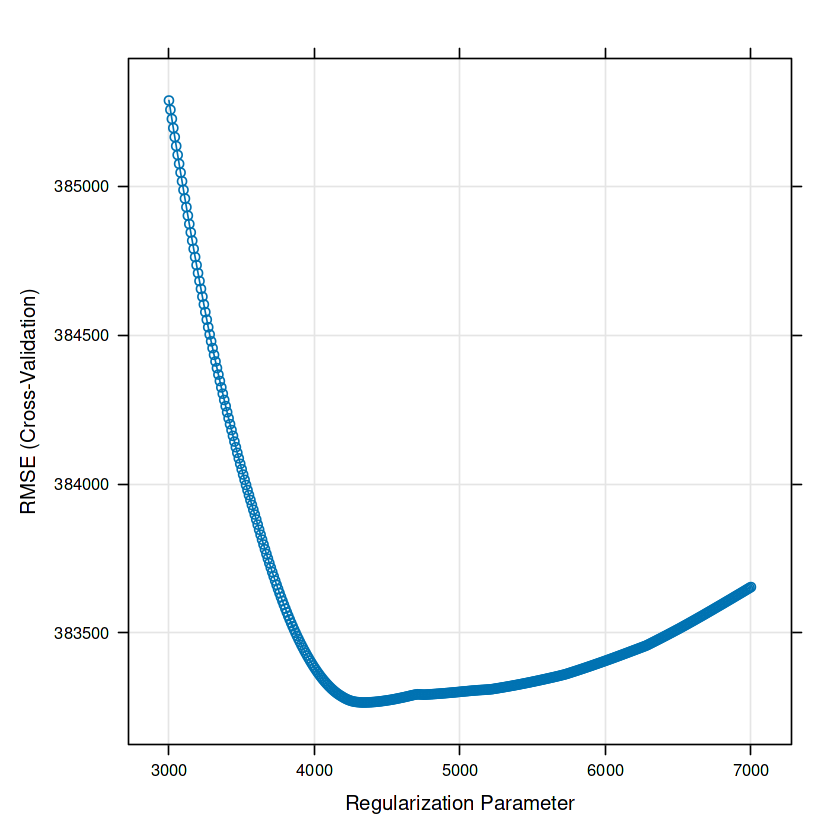

In [16]:
# Plot hyperparameter comparison
plot(lasso_fit)

In [17]:
# Variable Importance
varImp(lasso_fit)

glmnet variable importance

  only 20 most important variables shown (out of 37)

                        Overall
numOfBathrooms          100.000
livingAreaSqFt           56.966
hasAssociation           39.743
avgSchoolRating          38.851
zipcode                  29.305
propertyTaxRate          26.220
numOfWaterfrontFeatures  18.311
numOfStories             15.519
numOfElementarySchools   12.368
yearBuilt                10.812
hasSpa                    9.996
longitude                 8.523
avgSchoolSize             8.118
numPriceChanges           7.792
numOfBedrooms             7.783
numOfHighSchools          7.129
latest_saleyear           6.944
hasCooling                5.845
numOfParkingFeatures      5.118
numOfPhotos               4.834

## GLM Model

In [18]:
set.seed(1)

glm_fit <- train(latestPrice ~ ., data = train_data,
                 method = "glm",
                 preProcess = c("center", "scale"),
                 trControl = trainControl(method = "cv", 
                                          number = 10),
                 metric = "RMSE")

In [19]:
# Predict using model
test_prediction <- predict(glm_fit, newdata = test_data)
train_prediction <- predict(glm_fit, newdata = train_data)

# Evaluate Model
glm_test_rmse <- RMSE(pred = test_prediction, obs = test_data$latestPrice)
glm_train_rmse <- RMSE(pred = train_prediction, obs = train_data$latestPrice)

print(paste("GLM Test RMSE:", glm_test_rmse))
print(paste("GLM Training RMSE:", glm_train_rmse))

[1] "GLM Test RMSE: 295639.066613147"


[1] "GLM Training RMSE: 344303.80839386"


In [20]:
# Variable Importance
varImp(glm_fit)

glm variable importance

  only 20 most important variables shown (out of 37)

                        Overall
numOfBathrooms          100.000
livingAreaSqFt           69.598
hasAssociation           42.127
zipcode                  40.579
avgSchoolRating          39.068
propertyTaxRate          33.232
numOfWaterfrontFeatures  29.554
numOfStories             24.096
numOfElementarySchools   18.655
longitude                15.266
numOfHighSchools         14.970
hasSpa                   14.873
numOfBedrooms            14.853
numOfParkingFeatures     14.416
numPriceChanges          13.923
hasGarage                13.727
avgSchoolSize            13.615
yearBuilt                10.843
latest_saleyear          10.624
numOfPrimarySchools       9.895

## XGBoost Model

In [21]:
library(xgboost)

set.seed(1)

xgb_fit <- train(latestPrice ~ ., data = train_data,
                 method = "xgbTree",
                 preProcess = c("center", "scale"),
                 trControl = trainControl(method = "cv", 
                                          number = 10),
                 metric = "RMSE",
                 verbosity = 0)


Attaching package: ‘xgboost’




The following object is masked from ‘package:plotly’:

    slice




The following object is masked from ‘package:dplyr’:

    slice




In [22]:
# Predict using model
test_prediction <- predict(xgb_fit, newdata = test_data)
train_prediction <- predict(xgb_fit, newdata = train_data)

# Evaluate Model
xgb_test_rmse <- RMSE(pred = test_prediction, obs = test_data$latestPrice)
xgb_train_rmse <- RMSE(pred = train_prediction, obs = train_data$latestPrice)

print(paste("XGBoost Test RMSE:", xgb_test_rmse))
print(paste("XGBoost Training RMSE:", xgb_train_rmse))

[1] "XGBoost Test RMSE: 291227.046236903"


[1] "XGBoost Training RMSE: 182782.787294668"


In [23]:
# Variable Importance
varImp(xgb_fit)

xgbTree variable importance

  only 20 most important variables shown (out of 37)

                         Overall
livingAreaSqFt          100.0000
lotSizeSqFt              22.6024
numOfBathrooms           18.3916
zipcode                  17.7106
latitude                 11.0742
avgSchoolRating          10.6766
longitude                 7.9817
avgSchoolSize             5.3516
numOfBedrooms             3.9338
hasAssociation            3.4596
yearBuilt                 2.3465
numOfWaterfrontFeatures   1.7455
propertyTaxRate           1.5172
numOfParkingFeatures      1.1183
numOfPhotos               1.0890
numPriceChanges           0.8937
latest_saleyear           0.7961
numOfPrimarySchools       0.7799
garageSpaces              0.6545
avgSchoolDistance         0.5441

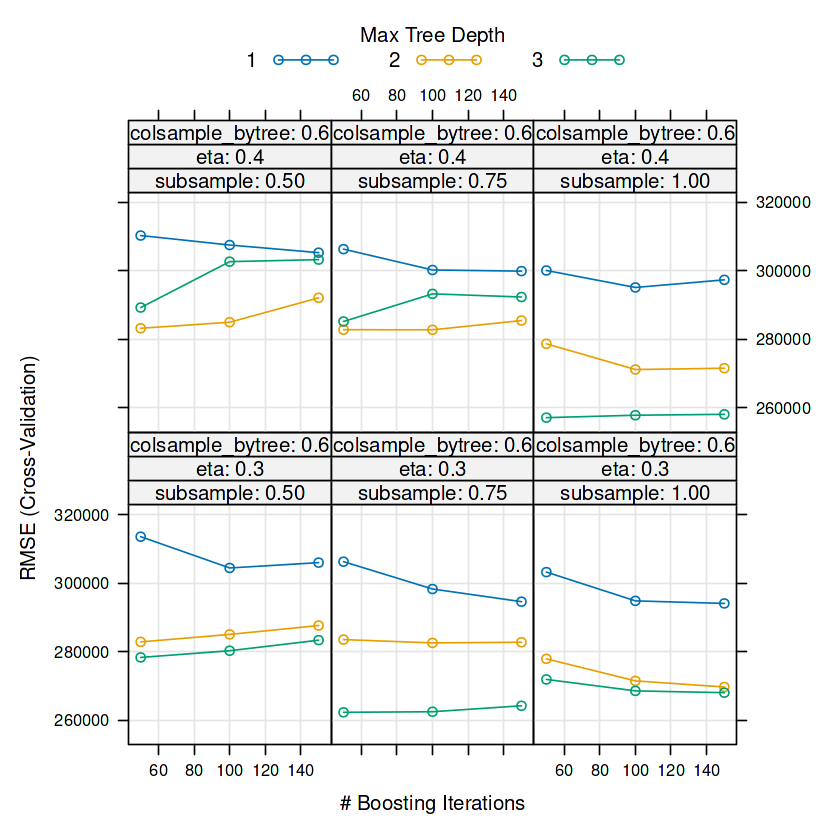

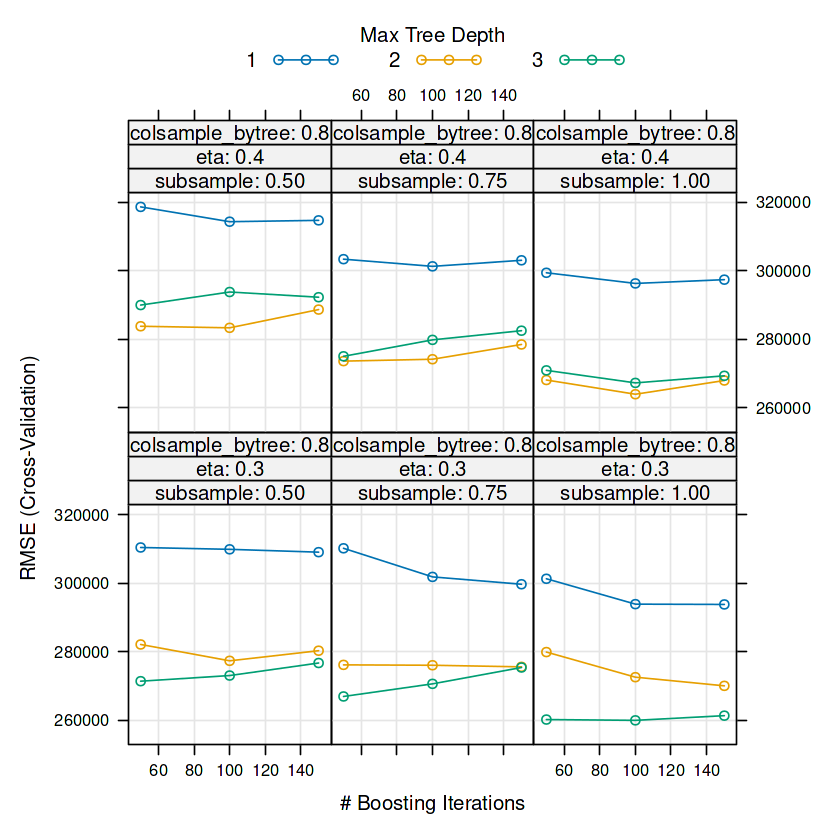

In [24]:
# Plot hyperparameter comparisons
plot(xgb_fit)

In [25]:
# Final model parameters
xgb_fit$bestTune

nrounds max_depth eta gamma colsample_bytree min_child_weight subsample
97 50      3         0.4 0     0.6              1                1

# Discussion

We now examine the best-performing model, XGBoost, to assess both its strengths and its shortcomings in producing accurate predictions.

When comparing the distributions of predicted versus actual property listing prices, it is evident that the model has a tendency to overvalue properties. Consequently, it identifies a larger share of properties as “good deals” (defined here as being priced at least 30% below or above the actual value) than might be realistic, rather than taking a more conservative valuation approach.

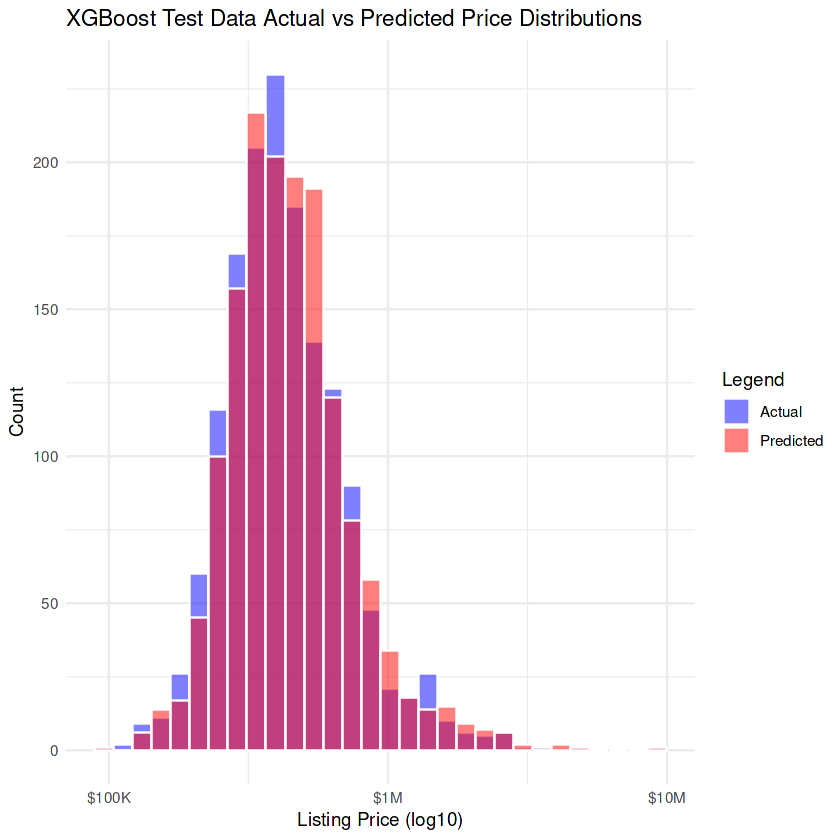

In [26]:
# Comparing distribution of predicted vs. actual prices
combined_data <- data.frame(
  value = c(test_data$latestPrice, test_prediction),
  type = rep(c("Actual", "Predicted"), each = nrow(test_data))
)

ggplot(combined_data, aes(x = value, fill = type)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 30, color = "white") +
  scale_x_log10(labels = label_dollar(scale_cut = cut_short_scale())) +
  scale_fill_manual(values = c("Actual" = "blue", "Predicted" = "red")) +
  theme_minimal() +
  labs(title = "XGBoost Test Data Actual vs Predicted Price Distributions",
       x = "Listing Price (log10)",
       y = "Count",
       fill = "Legend")

In [27]:
# For test data
deal_data <- data.frame(
  latestPrice = test_data$latestPrice,
  prediction = test_prediction,
  numOfBedrooms = test_data$numOfBedrooms,
  numOfBathRooms = test_data$numOfBathrooms,
  livingAreaSqFt = test_data$livingAreaSqFt
)

# Filter out negative predictions
deal_data <- subset(deal_data, prediction > 0 & latestPrice > 0)

# Calculate the difference ratio
deal_data$diff_ratio <- (deal_data$latestPrice - deal_data$prediction) / deal_data$latestPrice

# Assign colors
deal_data$deal_quality <- cut(
  deal_data$diff_ratio,
  breaks = c(-Inf, -0.3, 0.3, Inf),
  labels = c("Good", "Fair", "Bad")
)

# Map deal quality to custom colors
deal_colors <- c("Good" = "green3", "Fair" = "gray50", "Bad" = "red3")

# Add custom tooltip text
deal_data$hover_text <- paste0(
  "Actual: $", round(deal_data$latestPrice, 0), "<br>",
  "Predicted: $", round(deal_data$prediction, 0), "<br>",
  "Beds: ", deal_data$numOfBedrooms, "<br>",
  "Bathrooms: ", deal_data$numOfBathRooms, "<br>",
  "Square Footage: ", deal_data$livingAreaSqFt, "<br>"
)

p <- plot_ly(
  data = deal_data,
  x = ~prediction,
  y = ~latestPrice,
  type = 'scatter',
  mode = 'markers',
  color = ~deal_quality,
  colors = deal_colors,
  text = ~hover_text,
  hoverinfo = 'text',
  marker = list(size = 8, opacity = 0.7)
) %>%
  layout(
    title = "XGBoost Listing Deal Quality Prediction (Test Set)",
    xaxis = list(title = "Predicted Price ($)", type = "log"),
    yaxis = list(title = "Actual Listing Price ($)", type = "log"),
    legend = list(title = list(text = "Deal Quality")),
    shapes = list(  # Add reference line (y = x)
      list(
        type = "line",
        x0 = min(deal_data$prediction),
        y0 = min(deal_data$prediction),
        x1 = max(deal_data$prediction),
        y1 = max(deal_data$prediction),
        line = list(dash = "dash", color = "black")
      )
    )
  )

# Display plotly fix - Credit: https://www.kaggle.com/discussions/questions-and-answers/462758#2570083
fig <- ggplotly(p)
htmlwidgets::saveWidget(p, "p3.html")
display_html('<iframe src="p3.html" width=100% height=400></iframe>')

## Model-Specific Limitations and Potential Improvements

LASSO:
* LASSO typically struggles with datasets containing highly correlated predictors, as is the case here.
* Although the library used offers a fused LASSO implementation, I opted not to include it for demonstration purposes. Based on my prior experience with this model, I do not think it would perform substantially better on this dataset; however, further testing could confirm or reject this assumption.

GLM: 
* While the GLM achieved results comparable to XGBoost, it is disadvantaged since it can't interpret geographical data such as zipcode, latitude, and longitude well. One potential improvement could be to incorporate the aggregate statistic for the average listing price in the zipcode in the dataset.
* A related model not tested here is the Generalized Additive Model (GAM), which could perform better since it can capture non-linear relationships such as the exponential increase in home prices at the upper end of the market.

XGBoost:
* Despite being the top performer, there is likely room for improvement through more refined hyperparameter tuning. The current configuration appears to be slightly overfitting, as indicated by the larger gap between training and validation RMSE scores compared to other models.
* This model takes considerably longer to train.

Overall Limitations:
* Sparsity of high-priced home data leads to greater prediction error in those cases. All models were trained on a subset of the data, excluding listings over $1,000,000; a change that reduced the RMSE by around 60%. While this boosted the perceived performance, it also means the models are less applicable to the upper end of the housing market.
* All features were used, which may have had minimal impact on model performance. Selecting the top N features based on their correlation with listing price could improve model interpretability.

Examples of these suggestions were implemented below: (used GLM since it trains much quicker)

In [28]:
# Restrict dataset to prices below $1,000,000 listings
below_mil_df <- df %>%
  filter(latestPrice <= 1000000)

set.seed(1)
train_index <- createDataPartition(below_mil_df$latestPrice, p = 0.9, list = FALSE)

below_mil_train_data <- below_mil_df[train_index, ]
below_mil_test_data <- below_mil_df[-train_index, ]

In [29]:
# Train on subset of data using GLM model
set.seed(1)

below_mil_glm_fit <- train(latestPrice ~ ., data = below_mil_train_data,
                           method = "glm",
                           preProcess = c("center", "scale"),
                           trControl = trainControl(method = "cv", 
                                                    number = 10),
                           metric = "RMSE")

In [30]:
# Predict using model
below_mil_test_prediction <- predict(below_mil_glm_fit, newdata = below_mil_test_data)
below_mil_train_prediction <- predict(below_mil_glm_fit, newdata = below_mil_train_data)

# Evaluate Below $1,000,000 Model
print(paste("Below $1,000,000 GLM Test RMSE:", RMSE(pred = below_mil_test_prediction, obs = below_mil_test_data$latestPrice)))
print(paste("Below $1,000,000 GLM Training RMSE:", RMSE(pred = below_mil_train_prediction, obs = below_mil_train_data$latestPrice)))

# Comparison
print(paste("GLM Test RMSE:", glm_test_rmse))
print(paste("GLM Training RMSE:", glm_train_rmse))

[1] "Below $1,000,000 GLM Test RMSE: 136680.049339631"


[1] "Below $1,000,000 GLM Training RMSE: 127233.664212737"


[1] "GLM Test RMSE: 295639.066613147"


[1] "GLM Training RMSE: 344303.80839386"


In [31]:
# Restrict dataset to top 25 correlated features
top_features <- corr_df %>%
  slice_max(Correlation, n = 26) %>%
  pull(Feature)

top25_df <- df %>%
  select(all_of(top_features))

set.seed(1)
train_index <- createDataPartition(top25_df$latestPrice, p = 0.9, list = FALSE)

top25_train_data <- top25_df[train_index, ]
top25_test_data <- top25_df[-train_index, ]

In [32]:
# Train on subset of data using GLM model
set.seed(1)

top25_glm_fit <- train(latestPrice ~ ., data = top25_train_data,
                           method = "glm",
                           preProcess = c("center", "scale"),
                           trControl = trainControl(method = "cv", 
                                                    number = 10),
                           metric = "RMSE")

In [33]:
# Predict using model
top25_test_prediction <- predict(top25_glm_fit, newdata = top25_test_data)
top25_train_prediction <- predict(top25_glm_fit, newdata = top25_train_data)

# Evaluate top 25 features model
print(paste("Top 25 features GLM Test RMSE:", RMSE(pred = top25_test_prediction, obs = top25_test_data$latestPrice)))
print(paste("Top 25 features GLM Training RMSE:", RMSE(pred = top25_train_prediction, obs = top25_train_data$latestPrice)))

# Comparison
print(paste("GLM Test RMSE:", glm_test_rmse))
print(paste("GLM Training RMSE:", glm_train_rmse))

[1] "Top 25 features GLM Test RMSE: 302268.878098388"


[1] "Top 25 features GLM Training RMSE: 353195.565121207"


[1] "GLM Test RMSE: 295639.066613147"


[1] "GLM Training RMSE: 344303.80839386"
